Example of using [scipy.integrate.odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) to integrate a series of ordinary DEQs

In [1]:
from scipy.integrate import odeint
import numpy as np
from math import sqrt

In [2]:
# m, air_k specified as global parameters
params=[1.0, 0.12]

# the series of ODE's is incorporated in to a single function
# y: array-like set of dependent parameters
# t: the independent parameter, also array-like to return solutions at an arbitrary number of points
def func(y,t):
    g = 9.81
    m = params[0]
    air_k = params[1]
    v = sqrt(y[1]*y[1] + y[3]*y[3])
    f0 = y[1]                          # f_ri
    f1 = -air_k * v * y[1] / m         # f_vi
    f2 = y[3]                          # f_rj
    f3 = -air_k * v * y[3] / m - g     # f_vj
    return [f0,f1,f2,f3]

In [3]:
#starting coordinates
y0=[0,10,0,10]   # x=0, vx=10 m/s, y=0, vy=10 m/s

# solve for trajectory from t=0 to 1.6 seconds, in 200 steps
t = np.linspace(0,1.6,200) 
sol = odeint(func,y0,t)

# the solution is provided as a 2D array
np.info(sol)

class:  ndarray
shape:  (200, 4)
strides:  (32, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x559002b62400
byteorder:  little
byteswap:  False
type: float64


In [4]:
# unpack the solution into individual components for plotting
#y=np.array(y)
x=np.array(sol[ : , 0])
vx=np.array(sol[ : , 1])
y=np.array(sol[ : , 2])
vy=np.array(sol[ : , 3])
ke = 0.5 * params[0] * (vx*vx+vy*vy)

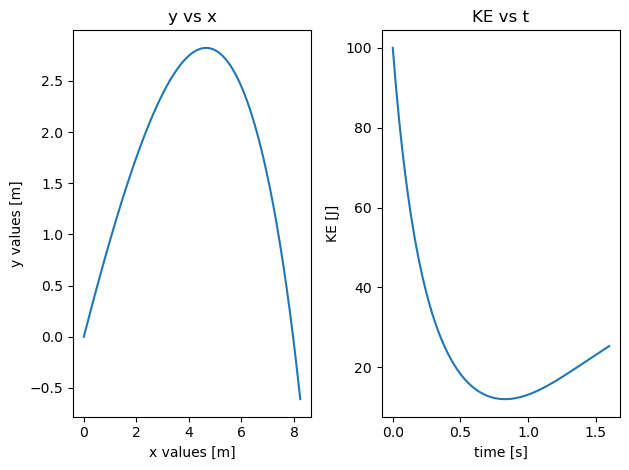

In [5]:
#Examples of plots
from matplotlib import pyplot as plt

plt.subplot(1, 2, 1)
plt.plot(x,y,'-')
plt.xlabel('x values [m]')
plt.ylabel('y values [m]')
plt.title('y vs x')

plt.subplot(1, 2, 2)
plt.plot(t,ke,'-')
plt.xlabel('time [s]')
plt.ylabel('KE [J]')
plt.title('KE vs t')

plt.tight_layout() 
plt.show()